<a href="https://www.kaggle.com/code/matinzargaran/linear-regression-on-palmpenguins?scriptVersionId=164055003" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

**In this notebook, I will guide you through a step-by-step analysis of the Palm Penguins dataset.
Before we begin, it's essential to become familiar with the data. Understanding the nature of datasets allows us to conduct a more inform analysis. Regarding that, I am going to explain everything.**

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/palmer-penguins-datasetalternative-iris-dataset/penguins.csv


## *Step 1: Import Libraries & Load the dataset*


Let's begin coding process by importing essential libraries. As I progress, if I require additional libraries, I will include them here as needed.


In [2]:
import pandas as pd
import numpy as np

#visualisation
import matplotlib.pyplot as plt
import seaborn as sns

#stat
#Regression part
from statsmodels.formula.api import ols    
import statsmodels.api as sm
#warnings
from warnings import filterwarnings
import warnings
warnings.simplefilter(action='ignore')

In [3]:
#Load the dataset
penguins = pd.read_csv('/kaggle/input/palmer-penguins-datasetalternative-iris-dataset/penguins.csv')
penguins.head()    #check the first 5 rows of dataset

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female


Up to this point, you may have observed that we have encountered terms such as  "bill_length," "bill_depth," and "flipper_length". If English is not your first language( like me :)) ), you might be curious about the exact meanings of these terms. As I mentioned before , understanding our data is crucial. So let's check these photos to clarify these terms befor we proceeding further.




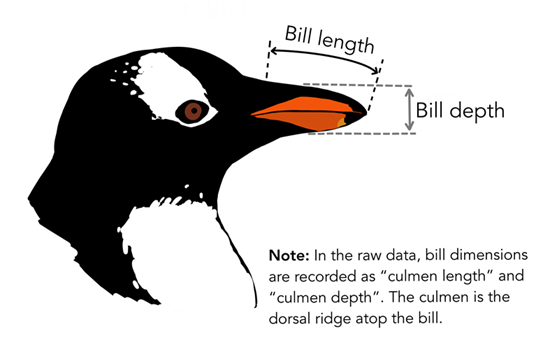


## *Step 2: Data Exploration*

In [4]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


Here we can see types of coulumns( Dtype) and number of enteries (Non-Null Count), it seems we have some nulls to let's check with another function

In [5]:
penguins.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

Number of Null in our dataset:
* bill_length_mm, bill_depth_mm, flipperlenght_mm, and body_mass_g have 2 Missing values(Null)
* on sex we have 11 missing values

> Let's have a look on missing values, in order to decide what we can do with them

In [6]:
n_data= penguins[penguins.isna().any(axis=1)]
n_data

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
178,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
218,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
256,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
268,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN


In [7]:
rows,cols = penguins.shape
print('Rows: ', rows, '\nColumns: ', cols)

Rows:  344 
Columns:  7


As you see the dataset consists of 344 rows and 7 columns. Usually rows are observation and columns are properties of those observation. If I drop the missing values from the dataset, Almost 3% of observations will be gone. Hence we proceed with dropping missing values because we loose a tiny bit of the data :))

In [8]:
#remove rows with missing values
penguins_v1=penguins.dropna()

In [9]:
#Let's check the difference between penguins dataset with penguins_v1(no missing values)

penguins.describe(include='all')

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
count,344,344,342.000000,342.000000,342.000000,342.000000,333
unique,3,3,NaN,NaN,NaN,NaN,2
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,male
freq,152,168,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN
std,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN


Describe's Summary:
* There are only 3 unique species in our dataset
* There are only 3 unique island in our dataset
* Most of our observations are about Adelie species(freq=152) and from Biscoe island(freq=168)
* Most of our observation comes from Male penguins(freq=168)
* Max: bill_length=59.6 mm, bill_depth=21.5 mm, flipper_length=231 mm, body_mass=6300 g.
* Min: bill_length=32.1 mm, bill_depth=13.1 mm, flipper_length=172 mm, body_mass=2700 g.
* Mean(Avg): bill_length=43.92 mm, bill_depth=17.15 mm, flipper_length=200.91 mm, body_mass=4201.75 g.

In [10]:
#penguins_v1 describe

penguins_v1.describe(include="all")

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
count,333,333,333.000000,333.000000,333.000000,333.000000,333
unique,3,3,NaN,NaN,NaN,NaN,2
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,male
freq,146,163,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.992793,17.164865,200.966967,4207.057057,NaN
std,NaN,NaN,5.468668,1.969235,14.015765,805.215802,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.500000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.500000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.600000,18.700000,213.000000,4775.000000,NaN


If you compare the summaries of these two tables, you can see that there is not much difference. Therefore, we will proceed with penguins_v1, which does not contain missing values.

# Linear Regression Model

There are three species in the dataset, I start with the most frequent one which is Adelie.


In [11]:
#Let's keep the Adelie from the clean dataset : penguins_v1

Adelie = penguins_v1[penguins_v1['species']=='Adelie']
Adelie.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male


To visualize more than one relationship at the same time we use **seaborn > pairplot()**. As you see the result is a scatter plot matrix:

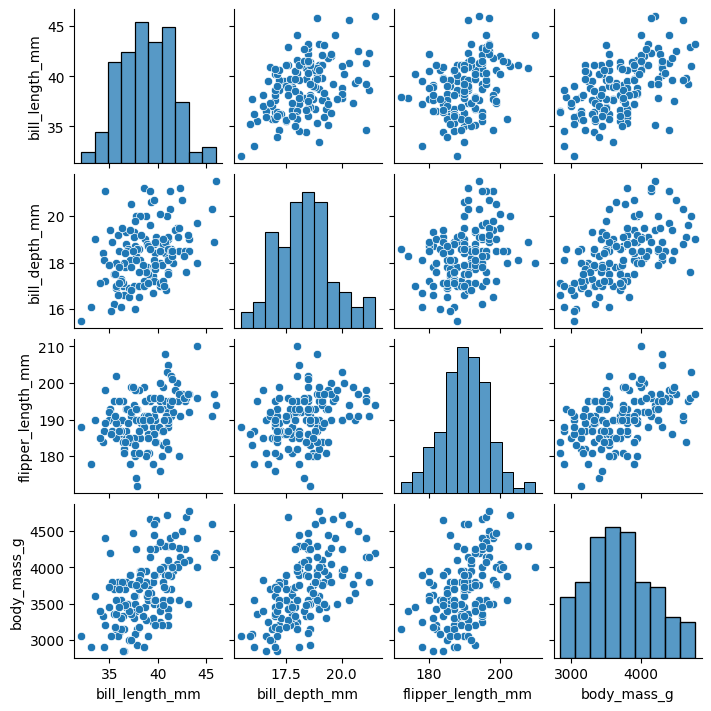

In [12]:
#scatter plot matrix of adelie

sns.pairplot(Adelie, height=1.8)

> From the scatter plot matrix some plots look **more likely to have a linear relationship**:
* bill_depth - body_mass
* bill_length - body_mass
* flipper_length - body_mass

Let's proceed with bill_depth and body relation and run a simple linear regression. First step is to subset these data from the dataset:

In [13]:
#Subset the data

bill_vs_body = Adelie[['bill_depth_mm', 'body_mass_g']]

#write the formula
# y(dependent) variable -> before ~
# x(independent) variable -> after ~

Adelie_formula = "body_mass_g ~ bill_depth_mm"

#build the regression model with ols() function -> from stats.models package

OLS = ols(Adelie_formula, bill_vs_body)

#Fit the model to data
model= OLS.fit()

So far :
1. I subset the data I needed for my regression model
2. Write the formula considering my Y and X variable
3. built the model with ols() function
4. call on the fit() function to fit the model to the data

Now, It's time for having some statistics abou the model with the help of : summary()

In [14]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.337
Model:                            OLS   Adj. R-squared:                  0.332
Method:                 Least Squares   F-statistic:                     73.06
Date:                Fri, 23 Feb 2024   Prob (F-statistic):           1.67e-14
Time:                        22:32:53   Log-Likelihood:                -1071.4
No. Observations:                 146   AIC:                             2147.
Df Residuals:                     144   BIC:                             2153.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -297.3829    469.422     -0.634      0.527   -1225.231     630.465
bill_depth_mm   218.2095     25.529      8.547      0.000     167.749     268.670
==============================================================================
Omnibus:                        4.410   Durbin-Watson:                   2.326
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                4.401
Skew:                           0.422   Prob(JB):                        0.111
Kurtosis:                       2.889   Cond. No.                         279.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## This is a Linear function:  $y = \beta_0 + \beta_1 x$ 

> $\beta_0$ is Intercept
> 
> $\beta_1$ is Slope

In the summary table there are intercept coef and bill_depth_mm coef(slope) so the Linear equation is:
> ## $y = -297.4 + 218.2 x$

As a result If a Adelie penguin has 1 mm longer bill_depth it's body mass is 218.2 g higher on average. 

#### Now Let's visualize the regression line:

<Axes: xlabel='bill_depth_mm', ylabel='body_mass_g'>

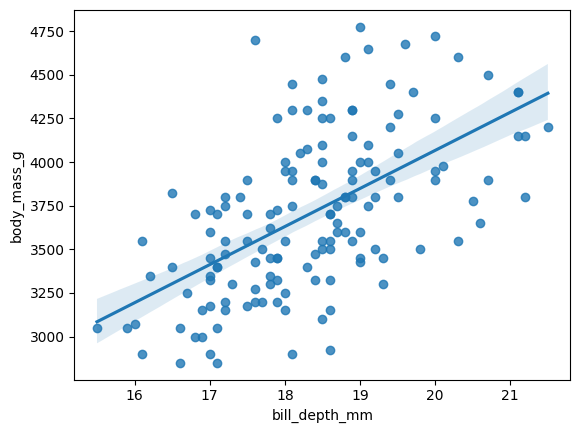

In [15]:
#Regression line

sns.regplot(bill_vs_body, x='bill_depth_mm', y='body_mass_g')

#### Model Assumptions

There are four model assumptions for Linear Regression models
* Linearity
* Normality
* Independent Observations
* Homoscedasticity 

I already check the "Linearity" assumption with scatter plot matrix. Also, regarding the Independent Observations, there is no reason to believe that one penguins body mass or bill depth are going to affect the measurments of rest of them. 
Normality and Homoscedasticity assumptions should be check after creating the model; so let's proceed and check these two :

In [16]:
#Let's check the residual as an approximation of errors

#1. subset the x :

x = bill_vs_body['bill_depth_mm']

#2. Use predict() function to get predicted values from the model

predicted_values = model.predict(x)

#3. Use resid attribute to calculate the residuals

residuals = model.resid

So far I provide everything needed to check Normality and homoscedasticity. Hence, let's go for visualization:

#### Normality

One way to check the normality is creating a histogram:

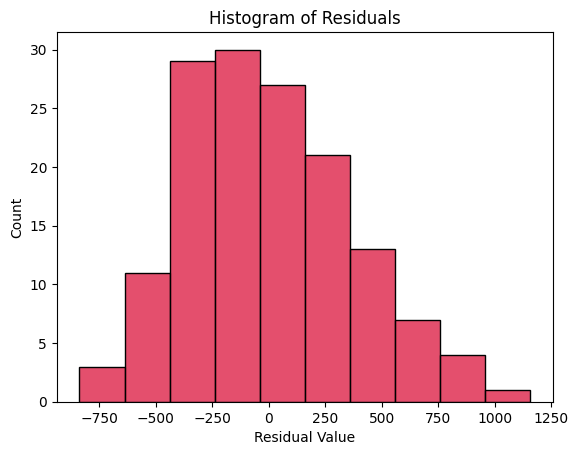

In [17]:
Normality_plot=sns.histplot(residuals, color='crimson')
Normality_plot.set_xlabel("Residual Value")
Normality_plot.set_title("Histogram of Residuals")
plt.show()

As we can see the residual values are almost normally distributed through the histogram, so this assumption is checked (more likely!):)

the other way to check the normality is with QQ-plot:

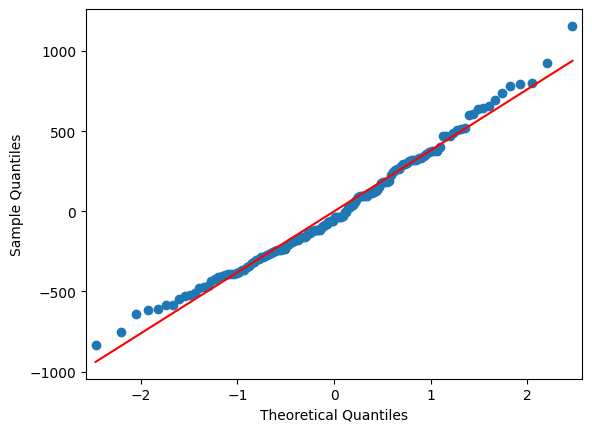

In [18]:
QQ_plot = sm.qqplot(model.resid, line='r')

On QQ-plot, if the residuals are normally distributed, we would expect a straight diagonal line, from bottom-left to upper-right. Residual are mostly normally distributed.

#### Homoscedasticity

Finally, let's make sure the data follows the homoscedasticity assumption. You can do this by plotting the predicted values against the residuals. If the points on the plot look scattered randomly, it means the assumption is probably satisfied.

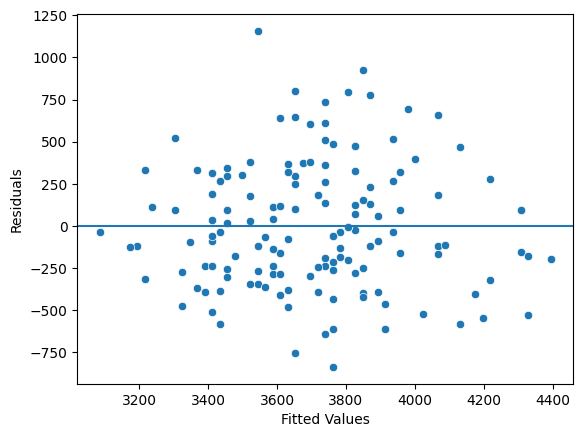

In [19]:
hmsd= sns.scatterplot(x=predicted_values, y=residuals)

hmsd.axhline(0)     #Refrence line at residual 0

hmsd.set_xlabel("Fitted Values")
hmsd.set_ylabel("Residuals")

plt.show()